In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

img=pd.read_csv('train_data.csv') #reading training data
test=pd.read_csv('test_data.csv') #reading testing data

s=test[["ID"]] #storing Class column of test data in a variable to transfer it into submission file afterwards
train_class=img['Class']

# Deleting unncessary columns from training and test file
img.drop('ID', inplace=True, axis=1)
img.drop('Class', inplace=True, axis=1)
test.drop('ID', inplace=True, axis=1)
test.drop('Class', inplace=True, axis=1)


#renaming variables for better understandibility
test_data=test.values
train_data=img.values
train_label=train_class.values


In [4]:
train_data = train_data.reshape(-1, 50,50, 1)
test_data = test_data.reshape(-1, 50,50, 1)
train_data.shape, test_data.shape

((932, 50, 50, 1), (400, 50, 50, 1))

In [5]:
train_data.dtype, test_data.dtype

(dtype('int64'), dtype('int64'))

In [25]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range = 0.2,
        zoom_range = 0.2,
        #horizontal_flip = True,
        #vertical_flip=True,
        brightness_range = (0.5, 1.5))

In [26]:
new_train_data=[]
for i in range(len(train_data)):
  new_train_data.append(train_data[i])
print(np.shape(new_train_data))

(932, 50, 50, 1)


In [28]:
train_data1=[]
train_label1=[]
for i in range(len(new_train_data)):
  for j in range(200):
    new_data=datagen.flow(new_train_data[i].reshape(1,50,50,1))
    new_data=np.reshape(new_data[0],(50,50))
    train_data1.append(new_data)
    train_label1.append(train_label[i])

In [29]:
np.shape(train_data1)

(279600, 50, 50)

In [30]:
from sklearn.utils import shuffle
import numpy as np

X = np.array(train_data1)
y = np.array(train_label1)
train_data1, train_label1 = shuffle(X, y)

In [ ]:
X_train, X_test1,train_label1, y_test = train_test_split(train_data1, train_label1,test_size=0.25,shuffle=True,stratify=train_label1)

In [32]:
X_train = train_data1.astype("float32") / 255
X_test = test_data.astype("float32") / 255
X_test1 = test_data.astype("float32") / 255

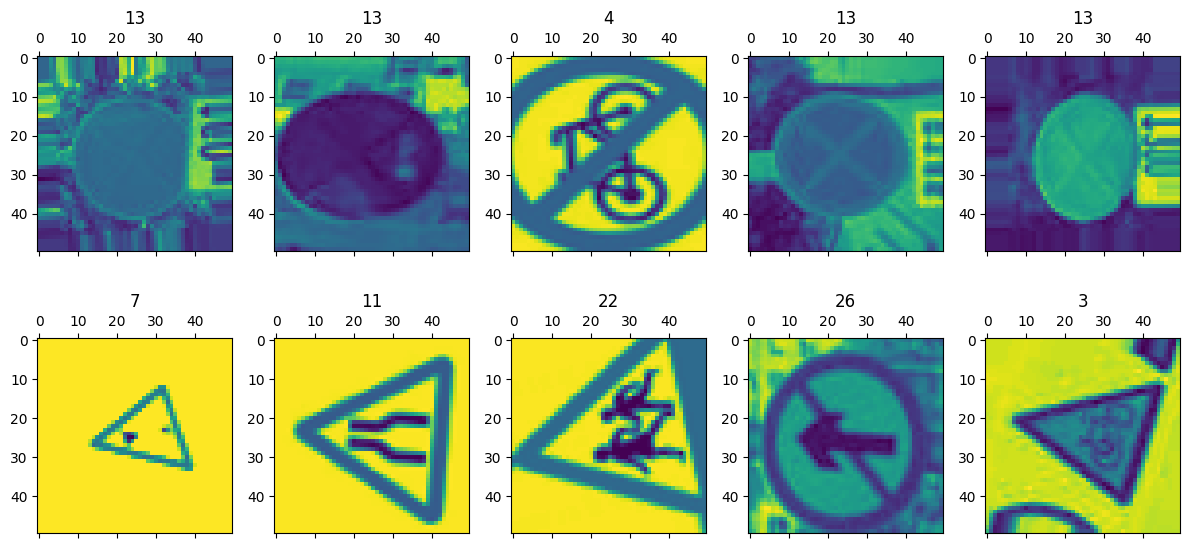

In [33]:
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=train_label1[n])
        n=n+1
plt.show() 

In [34]:
X_train.shape

(279600, 50, 50)

In [35]:
import tensorflow as tf
from keras import layers, models
cnn1 =models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=(50,50,1)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=64,kernel_size=(5,5),activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(rate=0.35),
    
    layers.Flatten(),
    layers.Dense(256,activation="relu"),
    layers.Dropout(rate=0.5),
    layers.BatchNormalization(),
    layers.Dense(512,activation="relu"),
    layers.Dropout(rate=0.3),
    
    layers.Dense(31,activation="softmax")])

In [36]:
cnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [37]:
cnn1.fit(X_train.reshape(-1,50,50), train_label1, epochs=50)

Epoch 1/50
8738/8738 [==============================] - 40s 5ms/step - loss: 0.6804 - accuracy: 0.8002
Epoch 2/50
8738/8738 [==============================] - 41s 5ms/step - loss: 0.2396 - accuracy: 0.9297
Epoch 3/50
8738/8738 [==============================] - 41s 5ms/step - loss: 0.1586 - accuracy: 0.9552
Epoch 4/50
8738/8738 [==============================] - 41s 5ms/step - loss: 0.1221 - accuracy: 0.9658
Epoch 5/50
8738/8738 [==============================] - 41s 5ms/step - loss: 0.1035 - accuracy: 0.9715
Epoch 6/50
8738/8738 [==============================] - 41s 5ms/step - loss: 0.0883 - accuracy: 0.9760
Epoch 7/50
8738/8738 [==============================] - 41s 5ms/step - loss: 0.0753 - accuracy: 0.9791
Epoch 8/50
8738/8738 [==============================] - 40s 5ms/step - loss: 0.0710 - accuracy: 0.9809
Epoch 9/50
8738/8738 [==============================] - 40s 5ms/step - loss: 0.0613 - accuracy: 0.9835
Epoch 10/50
8738/8738 [==============================] - 40s 5ms/step - l

In [ ]:
y_test
b = np.zeros((y_test.size, y_test.max() + 1))
b[np.arange(y_test.size), y_test] = 1
np.shape(y_test)

In [46]:
test_eval = cnn1.evaluate(X_test1, y_test, verbose=0)
test_eval[1]

0.949999988079071

In [47]:
cnn_predictions=cnn1.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [48]:
cnn_pred=[np.argmax(i) for i in cnn_predictions]
cnn_pred

[2,
 13,
 19,
 2,
 13,
 4,
 8,
 13,
 21,
 21,
 13,
 6,
 5,
 8,
 27,
 27,
 13,
 30,
 19,
 13,
 23,
 8,
 17,
 23,
 22,
 13,
 18,
 15,
 11,
 8,
 8,
 7,
 26,
 7,
 8,
 1,
 5,
 13,
 8,
 13,
 13,
 12,
 13,
 15,
 6,
 6,
 8,
 13,
 23,
 18,
 18,
 3,
 13,
 6,
 16,
 19,
 26,
 15,
 27,
 23,
 21,
 15,
 13,
 17,
 13,
 6,
 13,
 26,
 3,
 13,
 4,
 2,
 11,
 14,
 8,
 13,
 13,
 13,
 13,
 8,
 13,
 3,
 30,
 13,
 21,
 8,
 4,
 29,
 13,
 24,
 21,
 9,
 8,
 8,
 4,
 26,
 14,
 8,
 13,
 19,
 26,
 19,
 8,
 13,
 21,
 12,
 26,
 8,
 21,
 13,
 18,
 13,
 24,
 27,
 8,
 23,
 30,
 13,
 13,
 18,
 22,
 13,
 11,
 13,
 22,
 29,
 13,
 3,
 16,
 26,
 8,
 7,
 13,
 25,
 13,
 8,
 13,
 17,
 13,
 26,
 3,
 15,
 22,
 13,
 13,
 16,
 30,
 26,
 27,
 8,
 7,
 13,
 12,
 8,
 21,
 9,
 8,
 19,
 8,
 18,
 17,
 8,
 13,
 26,
 19,
 4,
 29,
 23,
 13,
 26,
 13,
 24,
 12,
 22,
 7,
 13,
 13,
 13,
 2,
 29,
 6,
 13,
 13,
 28,
 21,
 11,
 4,
 15,
 13,
 8,
 13,
 4,
 8,
 15,
 24,
 17,
 14,
 11,
 11,
 21,
 23,
 21,
 26,
 13,
 8,
 25,
 23,
 3,
 8,
 23,
 13,
 19,
 

In [52]:
test=pd.read_csv('test_data.csv')
s=test[["ID"]]
s['Class']=cnn_pred
s.to_csv("submission_cnn.csv",index=None)

/tmp/ipykernel_2960507/4078799144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['Class']=cnn_pred
